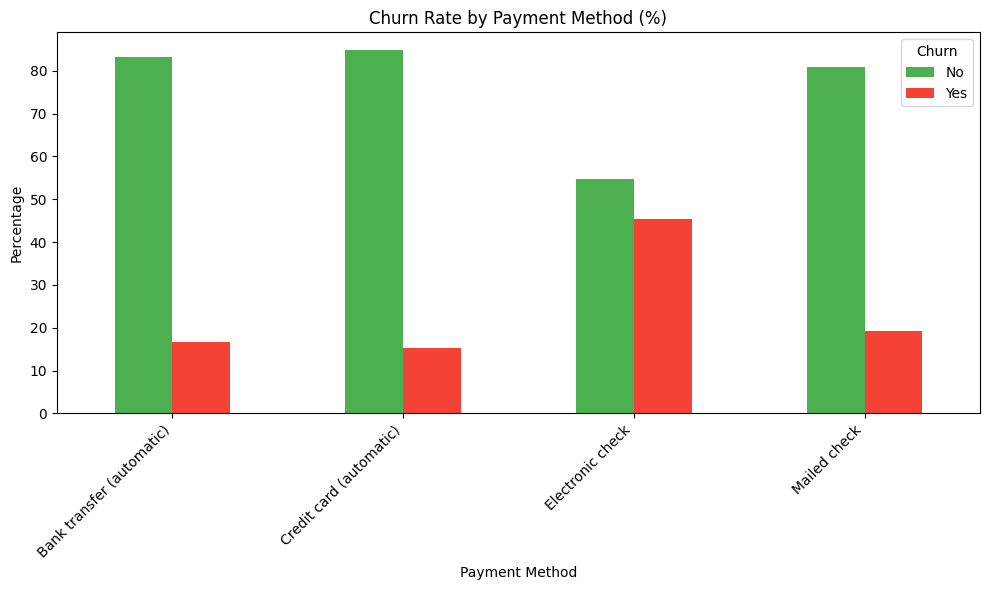

In [24]:
payment_churn = df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).unstack() * 100

payment_churn.plot(kind="bar", figsize=(10,6), color=["#4CAF50", "#F44336"])
plt.title("Churn Rate by Payment Method (%)")
plt.ylabel("Percentage")
plt.xlabel("Payment Method")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Churn")
plt.tight_layout()

plt.savefig("../visuals/churn_by_payment_method.png", dpi=300)
plt.show()


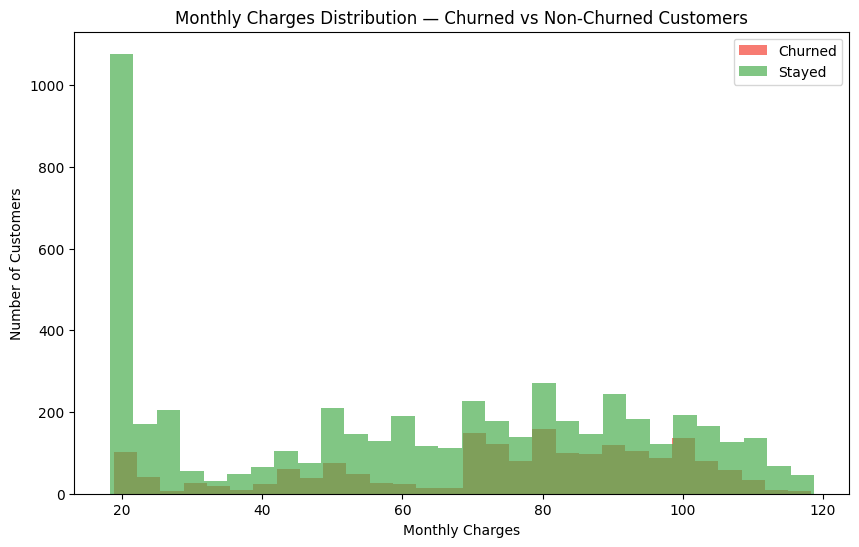

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df[df["Churn"]=="Yes"]["MonthlyCharges"], bins=30, alpha=0.7, label="Churned", color="#F44336")
plt.hist(df[df["Churn"]=="No"]["MonthlyCharges"], bins=30, alpha=0.7, label="Stayed", color="#4CAF50")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Monthly Charges Distribution — Churned vs Non-Churned Customers")
plt.legend()
plt.savefig("../visuals/churn_by_monthly_charges.png", dpi=300)
plt.show()


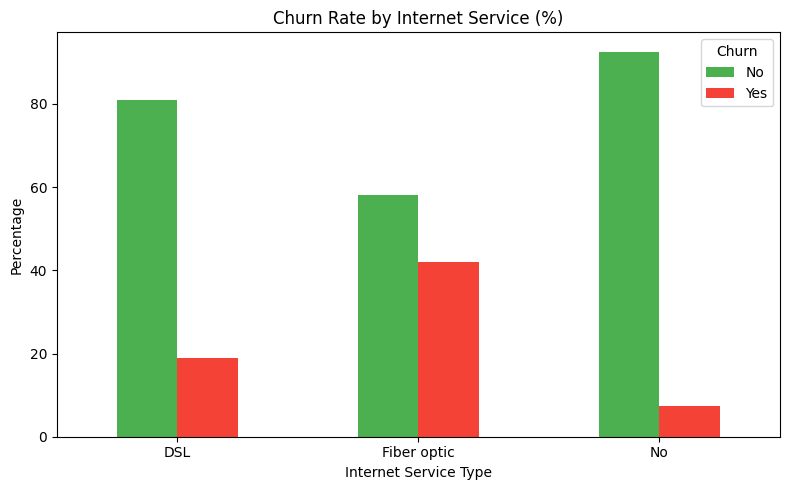

In [22]:
internet_churn = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100

internet_churn.plot(kind="bar", figsize=(8,5), color=["#4CAF50", "#F44336"])
plt.title("Churn Rate by Internet Service (%)")
plt.ylabel("Percentage")
plt.xlabel("Internet Service Type")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()

plt.savefig("../visuals/churn_by_internet_service.png", dpi=300)
plt.show()


C:\Users\Moe\AppData\Local\Temp\ipykernel_7996\2386339495.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("TenureGroup")["Churn"].value_counts(normalize=True).unstack() * 100


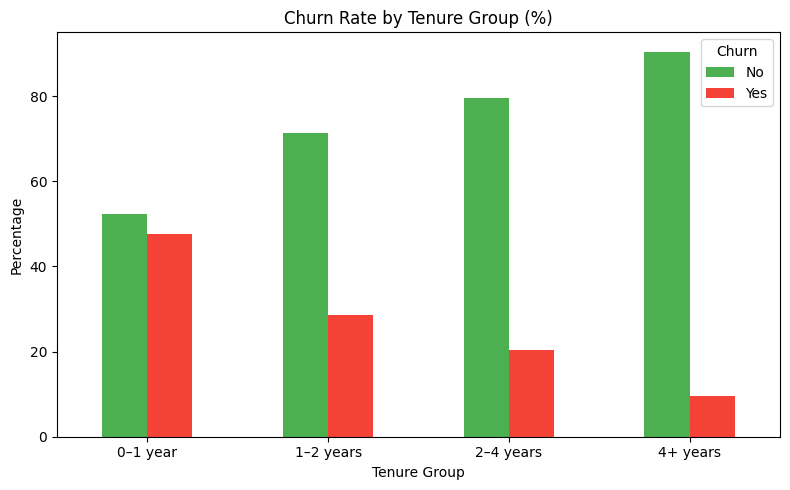

In [21]:
# Create tenure groups
bins = [0, 12, 24, 48, 72]
labels = ["0–1 year", "1–2 years", "2–4 years", "4+ years"]

df["TenureGroup"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

# Churn by tenure group
tenure_churn = df.groupby("TenureGroup")["Churn"].value_counts(normalize=True).unstack() * 100

tenure_churn.plot(kind="bar", figsize=(8,5), color=["#4CAF50", "#F44336"])
plt.title("Churn Rate by Tenure Group (%)")
plt.ylabel("Percentage")
plt.xlabel("Tenure Group")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()

plt.savefig("../visuals/churn_by_tenure.png", dpi=300)
plt.show()


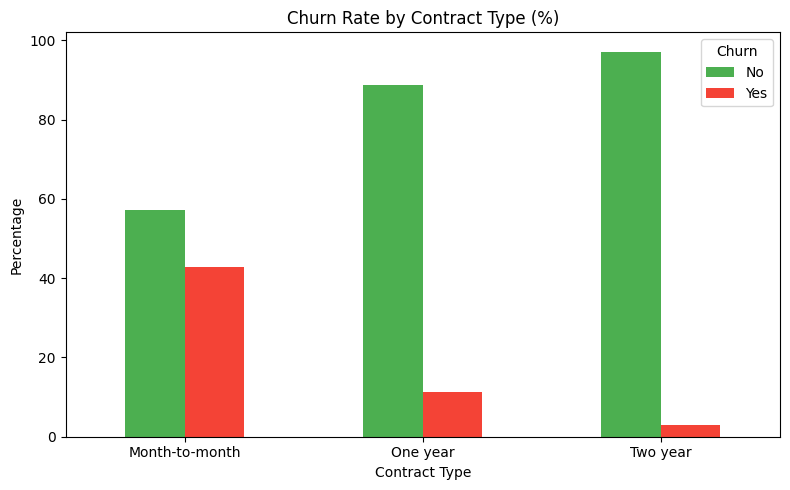

In [20]:
import matplotlib.pyplot as plt

contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100

contract_churn.plot(kind="bar", figsize=(8,5), color=["#4CAF50", "#F44336"])

plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Percentage")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()

plt.savefig("../visuals/churn_by_contract.png", dpi=300)
plt.show()


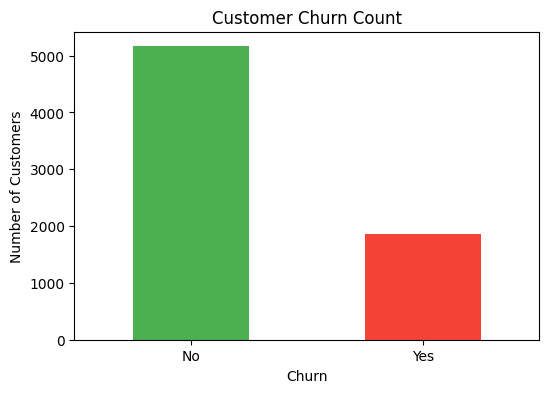

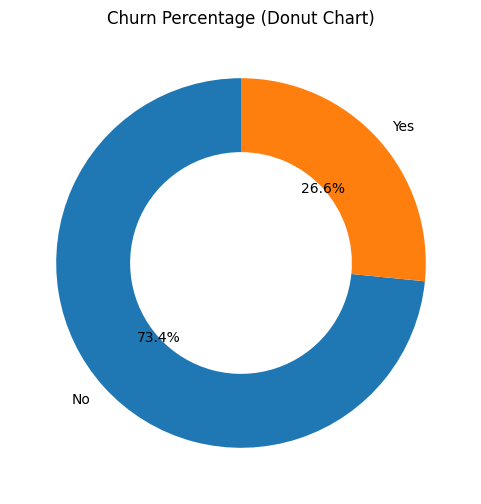

In [19]:
import matplotlib.pyplot as plt

# 1. Churn Count Chart
plt.figure(figsize=(6,4))
df["Churn"].value_counts().plot(kind="bar", color=["#4CAF50", "#F44336"])
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.savefig("../visuals/churn_count.png", dpi=300, bbox_inches="tight")
plt.show()

# 2. Churn Percentage Donut Chart
plt.figure(figsize=(6,6))
values = df["Churn"].value_counts()
plt.pie(values, labels=values.index, autopct="%1.1f%%", startangle=90, wedgeprops={'width':0.4})
plt.title("Churn Percentage (Donut Chart)")
plt.savefig("../visuals/churn_percentage_donut.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
# Churn percentage
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [17]:
# Churn count
df["Churn"].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [16]:
# Drop missing TotalCharges rows
df = df.dropna(subset=["TotalCharges"])

# Reset index after dropping
df = df.reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [15]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many missing values appeared
df["TotalCharges"].isna().sum()


np.int64(11)

In [14]:
# Basic dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
